In [1]:
import sys, os
sys.path.append('/Users/michaelgentnermac/Documents/ADL4CV/video_interpolation/')
import torch
import torch.nn as nn
from backprojection.bfgs import BFGSProjector
from interpolate_latent.functions import *
from models.wgan import Generator, Discriminator
import torchvision.transforms as transforms
import pickle
import numpy as np
import matplotlib.pyplot as plt
from backprojection.criticprojector import CriticProjector

netG = torch.load('/Users/michaelgentnermac/Documents/ADL4CV/final_models/wgan/g.pt',map_location=torch.device('cpu'))
netG = netG.double().cpu()
netD = torch.load('/Users/michaelgentnermac/Documents/ADL4CV/final_models/wgan/d.pt', map_location=torch.device('cpu'))
netD = netD.double().cpu()

netG = netG.eval()
netD = netD.eval()

In [2]:
def create_folder(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [3]:
toPil = transforms.ToPILImage()

### Load latent vectors

In [4]:
c_projector = CriticProjector(netG, netD, torch.device('cpu'))
latent_vectors = pickle.load(open('/Users/michaelgentnermac/Documents/ADL4CV/final_models/latent_video_linear.pkl', 'rb'))

In [29]:
z_d = []
for vec in latent_vectors:
    
    res = c_projector.project(vec, 100)
    z_d.append(res.detach())


torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([16])


/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


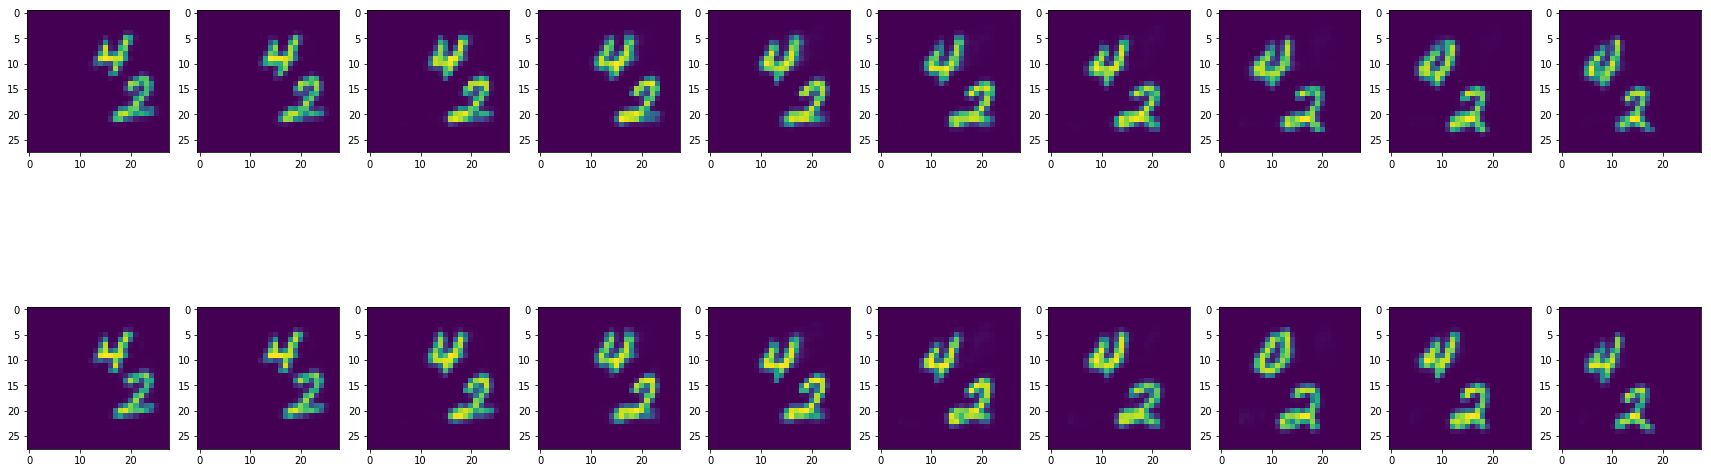

In [43]:
fig = plt.figure(figsize=(30, 10))
lstack = latent_vectors + z_d
for i, vec in enumerate(lstack):
    
    fig.add_subplot(2, len(latent_vectors), i+1)
    img = netG(torch.tensor(vec)).detach().numpy().squeeze()
    plt.imshow(img)
plt.show()

In [44]:
path = '/Users/michaelgentnermac/Documents/ADL4CV/results/d_correction/'

In [45]:
create_folder(os.path.join(path, 'ground_truth'))
create_folder(os.path.join(path, 'd_cor'))

In [52]:
for i, vec in enumerate(latent_vectors):
    
    img = netG(torch.tensor(vec)).detach().squeeze()
    toPil(img.squeeze().float()).save(os.path.join(path, 'ground_truth', str(i)+'.png'), 'PNG')

In [53]:
for i, vec in enumerate(z_d):
    
    img = netG(torch.tensor(vec)).detach().squeeze()
    toPil(img.squeeze().float()).save(os.path.join(path, 'd_cor', str(i)+'.png'), 'PNG')

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
